In [103]:
import math
import numpy as np
import PIL
from matplotlib import pyplot as plt
from PIL import Image

from scipy.ndimage import gaussian_filter


def read_image(image_path):
  """Read an image into a numpy array.

  Args:
    image_path: Path to the image file.

  Returns:
    Numpy array containing the image
  """
  img = Image.open(image_path)
  return np.array(img)


def write_image(image, out_path):
  """Writes a numpy array as an image file.

  Args:
    image: Numpy array containing image to write
    out_path: Path for the output image
  """
  img = Image.fromarray(image)
  img.save(out_path)


def display_image(image):
  """Displays a grayscale image using matplotlib.

  Args:
    image: HxW Numpy array containing image to display.
  """
  return plt.imshow(image, cmap="gray")


def convert_to_grayscale(image):
  """Convert an RGB image to grayscale.

  Args:
    image: HxWx3 uint8-type Numpy array containing the RGB image to convert.

  Returns:
    uint8-type Numpy array containing the image in grayscale
  """
  H, W = image.shape[0], image.shape[1]
  grarray = np.zeros((H, W), dtype='uint8')
  for row in range(H):
      for col in range(W):
          pixel = image[row][col]
          R, G, B = pixel[0], pixel[1], pixel[2]
          L = (299/1000) * R + (587/1000) * G + (114/1000) * B
          grarray[row][col] = int(L)
  return grarray


def convert_to_float(image):
  """Convert an image from 8-bit integer to 64-bit float format

  Args:
    image: Integer-valued numpy array with values in [0, 255]
  Returns:
    Float-valued numpy array with values in [0, 1]
  """
  return image.astype('float64') / 255.0


def convolution(image, kernel):
  """Convolves image with kernel.

  The image should be zero-padded so that the input and output image sizes
  are equal.
  Args:
    image: HxW Numpy array, the grayscale image to convolve
    kernel: hxw numpy array
  Returns:
    image after performing convolution
  """
  H, W = image.shape
  h, w = kernel.shape
  k = (h - 1) // 2    #1/2 height
  l = (w - 1) // 2    #1/2 side  
  np.flipud(kernel)
  np.fliplr(kernel)
  convd = np.zeros((H, W))
  for row in range(H):
    for col in range(W):
      acc = 0
      for r in range(-k, k+1):
        for c in range(-l, l+1):
          above = r + row < 0
          below = r + row > H - 1
          left = c + col < 0
          right = c + col > W - 1
          if above or below or left or right:
            pass
          else:
            acc += image[row+r][col+c] * kernel[r][c]
      convd[row][col] = acc
  return convd


def Conv1D(image, f):
  H, W = image.shape
  s = f.shape[0]
  k = (s - 1) // 2    #1/2 side
  convd = np.zeros((H, W))
  for row in range(H):
    for col in range(W):
      acc = 0
      for r in range(-k, k+1):
        for c in range(-k, k+1):
          above = r + row < 0
          below = r + row > H - 1
          left = c + col < 0
          right = c + col > W - 1
          if above or below or left or right:
            pass
          else:
            acc += f[r] * f[c] * image[row+r][col+c]
      convd[row][col] = acc
  return convd


def gaussian_blur(image, ksize=3, sigma=1.0):
  """Blurs image by convolving it with a gaussian kernel.

  Args:
    image: HxW Numpy array, the grayscale image to blur
    ksize: size of the gaussian kernel
    sigma: variance for generating the gaussian kernel

  Returns:
    The blurred image
  """
  f = np.zeros((ksize, 1))
  acc = 0
  for i in range(ksize):
    x = i - ((ksize-1) / 2)
    v = math.exp(-(x**2)/(2*sigma**2))
    f[i] = v
    acc += v
  f = f / acc
  return Conv1D(image, f)


def sobel_filter(image):
  """Detects image edges using the sobel filter.

  The sobel filter uses two kernels to compute the vertical and horizontal
  gradients of the image. The two kernels are:
  G_x = [-1 0 1]      G_y = [-1 -2 -1]
        [-2 0 2]            [ 0  0  0]
        [-1 0 1]            [ 1  2  1]

  After computing the two gradients, the image edges can be obtained by
  computing the gradient magnitude.

  Args:
    image: HxW Numpy array, the grayscale image
  Returns:
    HxW Numpy array from applying the sobel filter to image
  """
  pass


def dog(image, ksize1=5, sigma1=1.0, ksize2=9, sigma2=2.0):
  """Detects image edges using the difference of gaussians algorithm

  Args:
    image: HxW Numpy array, the grayscale image
    ksize1: size of the first gaussian kernel
    sigma1: variance of the first gaussian kernel
    ksize2: size of the second gaussian kernel
    sigma2: variance of the second gaussian kernel
  Returns:
    HxW Numpy array from applying difference of gaussians to image
  """
  pass


def dft(image):
  """Computes the discrete fourier transform of image

  This function should return the same result as
  np.fft.fftshift(np.fft.fft2(image)). You may assume that
  image dimensions will always be even.

  Args:
    image: HxW Numpy array, the grayscale image
  Returns:
    NxW complex Numpy array, the fourier transform of the image
  """
  pass


def idft(ft_image):
  """Computes the inverse discrete fourier transform of ft_image.

  For this assignment, the complex component of the output should be ignored.
  The returned array should NOT be complex. The real component should be
  the same result as np.fft.ifft2(np.fft.ifftshift(ft_image)). You
  may assume that image dimensions will always be even.

  Args:
    ft_image: HxW complex Numpy array, a fourier image
  Returns:
    NxW float Numpy array, the inverse fourier transform
  """
  pass


def visualize_kernels():
  """Visualizes your implemented kernels.

  This function should read example.png, convert it to grayscale and float-type,
  and run the functions gaussian_blur, sobel_filter, and dog over it. For each function,
  visualize the result and save it as example_{function_name}.png e.g. example_dog.png.
  This function does not need to return anything.
  """
  pass


def visualize_dft():
  """Visualizes the discrete fourier transform.

  This function should read example.png, convert it to grayscale and float-type,
  and run dft on it. Try masking out parts of the fourier transform image and
  recovering the original image using idft. Can you create a blurry version
  of the original image? Visualize the blurry image and save it as example_blurry.png.
  This function does not need to return anything.
  """
  pass



In [137]:
k = 11
s = 10
t = (((k-1)/2)-0.5)/s
example = read_image('example.png')

In [138]:
blurryexample = gaussian_blur(example, ksize=k, sigma=s)
scipyexample = gaussian_filter(example, sigma=s, truncate=t)

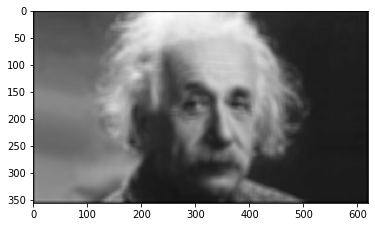

In [139]:
display_image(blurryexample)

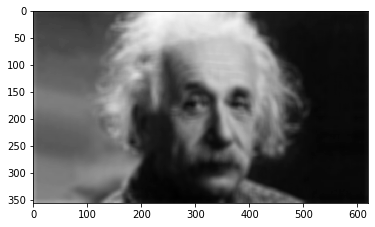

In [140]:
display_image(scipyexample)

In [141]:
print(blurryexample-scipyexample)

[[ -72.31353981  -68.13198335  -62.7162773  ...  -41.40821067
   -45.84934908  -48.20883336]
 [ -67.81238125  -63.04910065  -57.01061421 ...  -38.48719613
   -42.24588067  -45.92348282]
 [ -63.06012177  -56.68123327  -49.98354113 ...  -34.33266466
   -38.42948305  -42.44460528]
 ...
 [-116.9499138  -107.23087129  -95.79570561 ...  -24.8432532
   -27.56554268  -30.12299157]
 [-127.22165169 -118.64511352 -108.43342118 ...  -27.51237119
   -29.9169597   -32.1699557 ]
 [-135.08362505 -127.59700034 -118.55230966 ...  -30.16439064
   -33.26568758  -35.22922106]]


In [142]:
print(blurryexample)

[[30.68646019 34.86801665 39.2837227  ... 23.59178933 21.15065092
  18.79116664]
 [35.18761875 39.95089935 44.98938579 ... 26.51280387 23.75411933
  21.07651718]
 [39.93987823 45.31876673 51.01645887 ... 29.66733534 26.57051695
  23.55539472]
 ...
 [70.0500862  79.76912871 90.20429439 ... 23.1567468  20.43445732
  17.87700843]
 [61.77834831 70.35488648 79.56657882 ... 20.48762881 18.0830403
  15.8300443 ]
 [53.91637495 61.40299966 69.44769034 ... 17.83560936 15.73431242
  13.77077894]]


In [143]:
print(scipyexample)

[[103 103 102 ...  65  67  67]
 [103 103 102 ...  65  66  67]
 [103 102 101 ...  64  65  66]
 ...
 [187 187 186 ...  48  48  48]
 [189 189 188 ...  48  48  48]
 [189 189 188 ...  48  49  49]]
